# 1) EXPLORATION

## LOAD DATA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv('train.csv')
titanic.head()

/home/lluis/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
features = titanic.drop('Survived', axis=1)
target = titanic['Survived']

## MUTUAL INFORMATION

Fare           0.117630
Pclass         0.065688
PassengerId    0.015306
Parch          0.014906
SibSp          0.005502
Name: MI Scores, dtype: float64


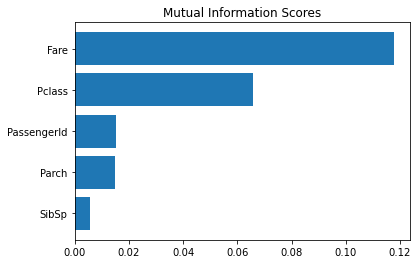

<Figure size 800x500 with 0 Axes>

In [6]:
from sklearn.feature_selection import mutual_info_regression

def calculate_MI_scores(X, y):
    cols_MI = [col for col in X.columns if (X[col].dtype=="int" or X[col].dtype=="float") and X[col].isnull().sum()==0]
    
    Z = X[cols_MI]

    mi_scores = mutual_info_regression(Z, y)

    MI_scores = pd.Series(mi_scores, name="MI Scores", index=Z.columns)
    MI_scores = MI_scores.sort_values(ascending=False)
    
    print(MI_scores)
    
    return MI_scores

def plot_MI_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.figure(dpi=100, figsize=(8, 5))



scores = calculate_MI_scores(features, target)
plot_MI_scores(scores)



In [7]:
#Does null value has an effect, in case of a lot of nulls

print(titanic.groupby(titanic['Age'].isnull())['Survived'].mean())
print(titanic.groupby(titanic['Age'].isnull())['Survived'].sum())
print(titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean())
print(titanic.groupby(titanic['Cabin'].isnull())['Survived'].sum())

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64
Age
False    290
True      52
Name: Survived, dtype: int64
Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64
Cabin
False    136
True     206
Name: Survived, dtype: int64


# 2) PREPARE DATA FOR TRAINING

## Load again

In [8]:
features = titanic.drop('Survived', axis=1)
target = titanic['Survived']

## Drop features without info

In [9]:
features.drop(['PassengerId', "Name", "Ticket"], axis=1, inplace=True)

## Add columns and drop

In [10]:
features['Cabin_null'] = np.where(titanic['Cabin'].isnull(), 0, 1)
features['Age_null'] = np.where(titanic['Age'].isnull(), 0, 1)
features.drop(['Cabin'], axis=1, inplace=True)

## Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.25, random_state=1)

## One-Hot Encoding

In [12]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

columns_OHE = ["Embarked", "Sex"]

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[columns_OHE]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[columns_OHE]))

OH_cols_train.columns = OH_encoder.get_feature_names(columns_OHE)
OH_cols_valid.columns = OH_encoder.get_feature_names(columns_OHE)

OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

num_X_train = X_train.drop(columns_OHE, axis=1)
num_X_valid = X_valid.drop(columns_OHE, axis=1)

OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)



OH_X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin_null,Age_null,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Sex_female,Sex_male
35,1,42.0,1,0,52.0000,0,1,0.0,0.0,1.0,0.0,0.0,1.0
46,3,NaN,1,0,15.5000,0,0,0.0,1.0,0.0,0.0,0.0,1.0
453,1,49.0,1,0,89.1042,1,1,1.0,0.0,0.0,0.0,0.0,1.0
291,1,19.0,1,0,91.0792,1,1,1.0,0.0,0.0,0.0,1.0,0.0
748,1,19.0,1,0,53.1000,1,1,0.0,0.0,1.0,0.0,0.0,1.0


## Imputer

In [13]:
OH_X_train['Age'].fillna(OH_X_train['Age'].mean(), inplace=True)
OH_X_valid['Age'].fillna(OH_X_valid['Age'].mean(), inplace=True)

print(OH_X_train.head())

     Pclass        Age  SibSp  Parch     Fare  Cabin_null  Age_null  \
35        1  42.000000      1      0  52.0000           0         1   
46        3  30.073682      1      0  15.5000           0         0   
453       1  49.000000      1      0  89.1042           1         1   
291       1  19.000000      1      0  91.0792           1         1   
748       1  19.000000      1      0  53.1000           1         1   

     Embarked_C  Embarked_Q  Embarked_S  Embarked_nan  Sex_female  Sex_male  
35          0.0         0.0         1.0           0.0         0.0       1.0  
46          0.0         1.0         0.0           0.0         0.0       1.0  
453         1.0         0.0         0.0           0.0         0.0       1.0  
291         1.0         0.0         0.0           0.0         1.0       0.0  
748         0.0         0.0         1.0           0.0         0.0       1.0  


## MI again

Sex_female      0.157364
Fare            0.150869
Sex_male        0.143263
Pclass          0.129368
Age             0.067130
Embarked_Q      0.064205
Cabin_null      0.047838
Parch           0.026491
Age_null        0.017169
SibSp           0.013326
Embarked_nan    0.007064
Embarked_S      0.006774
Embarked_C      0.000000
Name: MI Scores, dtype: float64


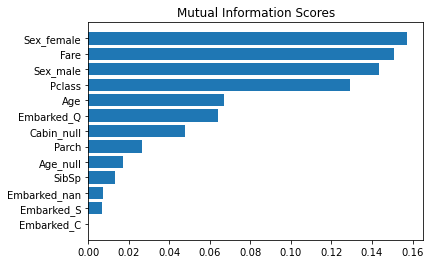

<Figure size 800x500 with 0 Axes>

In [14]:
scores = calculate_MI_scores(OH_X_train, y_train)
plot_MI_scores(scores)


# TRAINING AND VALIDATION

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
import joblib

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

list_n_estimators = [5, 10, 15, 20, 25, 30, 40, 50, 100]
list_max_depth = [2, 4, 6, 8, 10, 16, 32, None]

lower_error = 10
best_param = []
best_model = []

for n_estimators in list_n_estimators:
    for max_depth in list_max_depth:
        MODEL_PARAMS = {
            "n_estimators": n_estimators,
            "max_depth": max_depth
        }
        
        rf = RandomForestClassifier(**MODEL_PARAMS)

        rf.fit(OH_X_train, y_train.values.ravel())

        preds = rf.predict(OH_X_valid)
        
        mean_error = mean_absolute_error(y_valid, preds)
        #print(n_estimators, max_depth, mean_error)

        cm = confusion_matrix(y_valid, preds)
        tn, fp, fn, tp = cm.ravel()
        recall = tp / (tp + fn)
        accuracy = (tp + tn) / (tp + fp + fn + tn) 

        #print("Recall: ", recall)
        #print("Accuracy: ", accuracy)
        
        if(mean_error < lower_error):
            lower_error = mean_error
            best_param = MODEL_PARAMS
            best_model = rf
            best_recall = recall
            best_acc = accuracy
            

print("Best option for RF: ", best_param)
print("Mean Absolute Error", lower_error)
print("Recall", best_recall)
print("Accuracy", best_acc)

joblib.dump(best_model, 'RF_model.pkl')


Best option for RF:  {'n_estimators': 5, 'max_depth': 8}
Mean Absolute Error 0.19282511210762332
Recall 0.631578947368421
Accuracy 0.8071748878923767


['RF_model.pkl']

## XGBoost

In [17]:
from xgboost import XGBClassifier

list_n_estimators = [10, 30, 50, 100, 250, 500, 1000, 5000]
list_learning_rate = [0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.1]
n_jobs = 8
early_stopping_rounds = 10

lower_error = 10
best_param = []
best_model = []

for n_estimators in list_n_estimators:
    for learning_rate in list_learning_rate:
        MODEL_PARAMS = {
            "n_estimators": n_estimators,
            "learning_rate": learning_rate,
            "n_jobs": n_jobs,
            "early_stopping_rounds": early_stopping_rounds
        }
        
        xgb_model = XGBClassifier(**MODEL_PARAMS)

        xgb_model.fit(OH_X_train, y_train, eval_set=[(OH_X_valid, y_valid)], verbose=False)
        
        preds = xgb_model.predict(OH_X_valid)
        
        mean_error = mean_absolute_error(y_valid, preds)
        #print(MODEL_PARAMS)

        cm = confusion_matrix(y_valid, preds)
        tn, fp, fn, tp = cm.ravel()
        recall = tp / (tp + fn)
        accuracy = (tp + tn) / (tp + fp + fn + tn) 
        #print("Mean error: ",mean_error)
        #print("Recall: ", recall)
        #print("Accuracy: ", accuracy)
        
        if(mean_error < lower_error):
            lower_error = mean_error
            best_param = MODEL_PARAMS
            best_model = rf
            best_recall = recall
            best_acc = accuracy
        
    
print("Best option for XGBoost: ", best_param)
print("Mean Absolute Error", lower_error)
print("Recall", best_recall)
print("Accuracy", best_acc)

joblib.dump(best_model, 'XGB_model.pkl')        

Best option for XGBoost:  {'n_estimators': 50, 'learning_rate': 0.04, 'n_jobs': 8, 'early_stopping_rounds': 10}
Mean Absolute Error 0.2062780269058296
Recall 0.6
Accuracy 0.7937219730941704


['XGB_model.pkl']

### Neural Networks

In [18]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.models import load_model

2024-03-18 17:36:18.295882: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-18 17:36:18.296971: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 17:36:18.340015: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 17:36:18.469853: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-18 17:36:19.284592: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [19]:
number_features = OH_X_train.shape[1]

list_number_neurons = [10, 16, 32, 64, 128, 256]
list_batch_size = [64, 128, 256, 512]
list_epochs = [128, 256, 512, 1024, 2048]
#list_number_neurons = [10, 16]
#list_batch_size = [128]
#list_epochs = [128]
patience = 10
min_delta = 0.001

local_max_accuracy = 0
for number_neurons in list_number_neurons:
    for batch_size in list_batch_size:
        for epochs in list_epochs:
            
            model = keras.Sequential([
                layers.Dense(number_neurons, activation="relu", input_shape=[number_features]),
                layers.Dense(number_neurons, activation="relu"),
                layers.Dense(number_neurons, activation="relu"),
                layers.Dense(number_neurons, activation="relu"),
                layers.Dense(1, activation="sigmoid"),
                ])


            model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["binary_accuracy"],)

            early_stopping = keras.callbacks.EarlyStopping(patience=patience, min_delta=min_delta,restore_best_weights=True,)


            history = model.fit(OH_X_train, y_train, validation_data=(OH_X_valid, y_valid),
                                batch_size=batch_size, epochs=epochs, callbacks=[early_stopping],verbose=0,)
            
            history_df = pd.DataFrame(history.history)
            achieved_acc = history_df["val_binary_accuracy"].max()
            print(number_neurons, batch_size, epochs, achieved_acc)
            #print(achieved_acc)
            if( achieved_acc > local_max_accuracy):
                best_neurons = number_neurons
                best_batch = batch_size
                best_epoch = epochs
                local_max_accuracy = achieved_acc
                best_model = model
                best_history = history
                
                
                
history_df = pd.DataFrame(best_history.history)

#history_df.loc[5:, ["loss", "val_loss"]].plot()
#history_df.loc[5:, ["binary_accuracy", "val_binary_accuracy"]].plot()

print("Number neurons: ", best_neurons)
print("Number batch: ", best_batch)
print("Number epoch: ", best_epoch)
print("Best Validation Loss: ", history_df["val_loss"].min())
print("Best Validation Accuracy: ", history_df["val_binary_accuracy"].max())


preds = (best_model.predict(OH_X_valid) > 0.5).astype(int)
mean_error = mean_absolute_error(y_valid, preds)
print("Mean error: ", mean_error)



/home/lluis/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10 64 128 0.7892376780509949
10 64 256 0.7847533822059631
10 64 512 0.7847533822059631
10 64 1024 0.7892376780509949
10 64 2048 0.695067286491394
10 128 128 0.7892376780509949
10 128 256 0.713004469871521
10 128 512 0.7982062697410583
10 128 1024 0.7937219738960266
10 128 2048 0.7802690863609314
10 256 128 0.7533632516860962
10 256 256 0.6412556171417236
10 256 512 0.7847533822059631
10 256 1024 0.7668161392211914
10 256 2048 0.7802690863609314
10 512 128 0.6233183741569519
10 512 256 0.6771300435066223
10 512 512 0.6322869658470154
10 512 1024 0.6591928005218506
10 512 2048 0.5964125394821167
16 64 128 0.7757847309112549
16 64 256 0.7892376780509949
16 64 512 0.7802690863609314
16 64 1024 0.7892376780509949
16 64 2048 0.8116592168807983
16 128 128 0.7847533822059631
16 128 256 0.7713004350662231
16 128 512 0.7802690863609314
16 128 1024 0.7892376780509949
16 128 2048 0.7668161392211914
16 256 128 0.7040358781814575
16 256 256 0.8071748614311218
16 256 512 0.7488788962364197
16 256 102

In [20]:
best_model.save("NN.keras")

# TEST

In [21]:
titanic_test = pd.read_csv('test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Cleaning data in the same way as before

In [22]:
titanic_test_predict = pd.read_csv('test.csv')

titanic_test_predict.drop(['PassengerId', "Name", "Ticket"], axis=1, inplace=True)


titanic_test_predict['Cabin_null'] = np.where(titanic_test_predict['Cabin'].isnull(), 0, 1)
titanic_test_predict['Age_null'] = np.where(titanic_test_predict['Age'].isnull(), 0, 1)
titanic_test_predict.drop(['Cabin'], axis=1, inplace=True)

titanic_test_predict['Age'].fillna(OH_X_train['Age'].mean(), inplace=True)
titanic_test_predict['Fare'].fillna(OH_X_train['Fare'].mean(), inplace=True)


OH_cols_test = pd.DataFrame(OH_encoder.transform(titanic_test_predict[columns_OHE]))

OH_cols_test.columns = OH_encoder.get_feature_names(columns_OHE)

OH_cols_test.index = titanic_test_predict.index

num_X_test = titanic_test_predict.drop(columns_OHE, axis=1)

test_data = pd.concat([num_X_test, OH_cols_test], axis=1)

test_data.columns = test_data.columns.astype(str)

print(test_data.head())

test_data.isnull().sum()


   Pclass   Age  SibSp  Parch     Fare  Cabin_null  Age_null  Embarked_C  \
0       3  34.5      0      0   7.8292           0         1         0.0   
1       3  47.0      1      0   7.0000           0         1         0.0   
2       2  62.0      0      0   9.6875           0         1         0.0   
3       3  27.0      0      0   8.6625           0         1         0.0   
4       3  22.0      1      1  12.2875           0         1         0.0   

   Embarked_Q  Embarked_S  Embarked_nan  Sex_female  Sex_male  
0         1.0         0.0           0.0         0.0       1.0  
1         0.0         1.0           0.0         1.0       0.0  
2         1.0         0.0           0.0         0.0       1.0  
3         0.0         1.0           0.0         0.0       1.0  
4         0.0         1.0           0.0         1.0       0.0  


Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Cabin_null      0
Age_null        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Embarked_nan    0
Sex_female      0
Sex_male        0
dtype: int64

## Generating prediction

In [23]:
#best_model = load_model("NN.keras")
best_model = joblib.load('RF_model.pkl')

In [24]:
#y_pred = (best_model.predict(test_data) > 0.5).astype(int)
#y_pred = pd.Series(y_pred[:, 0])

y_pred = best_model.predict(test_data)

In [25]:
prediction = pd.DataFrame({"PassengerId": titanic_test["PassengerId"],
                   "Survived": y_pred
                  })


In [26]:
prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [27]:
prediction.to_csv("submit_prediction.csv", index=False)

## Check correct format

In [28]:
check = pd.read_csv('gender_submission.csv')
check.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [29]:
check = pd.read_csv('submit_prediction.csv')
check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
